In [1]:
import pickle

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
genres = pd.read_csv("genres.csv") 
genres.head(10)

,volume,genre
0,50,blues
1,51,blues
2,57,blues
3,59,blues
4,69,blues
5,77,blues
6,84,blues
7,200,pop
8,280,pop
9,212,pop


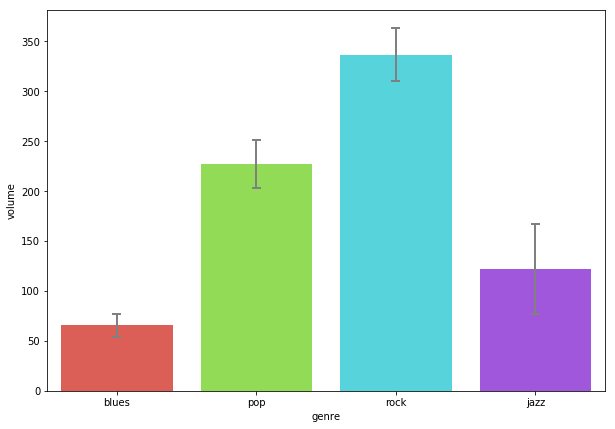

In [3]:
#sns.scatterplot(x="reflectance",y="weight",data=coins, hue="denomination")
sns.barplot(x = 'genre', y = 'volume', data = genres,
            palette = 'hls',
            order = ['blues', 'pop', 'rock', 'jazz'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

In [4]:
# test train split
X = genres[["volume"]].to_numpy()
y = genres[["genre"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
## Import your favourite classifier and train it using the X_train data and hte y_train labels
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
## make sure you instantiate your classifier and name it clf

## for example, if you are using perceptron, you would do the following - 

# -> from sklearn.linear_model import Perceptron
# -> clf = Perceptron(tol=1e-3, random_state=0)
# .... call fit , etc.

/home/ee250/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [6]:
## test the accuracy of your model
predictions = clf.predict(X_test)
predictions

array(['blues', 'jazz', 'jazz', 'pop', 'jazz', 'pop', 'blues', 'pop',
       'rock', 'blues'], dtype=object)

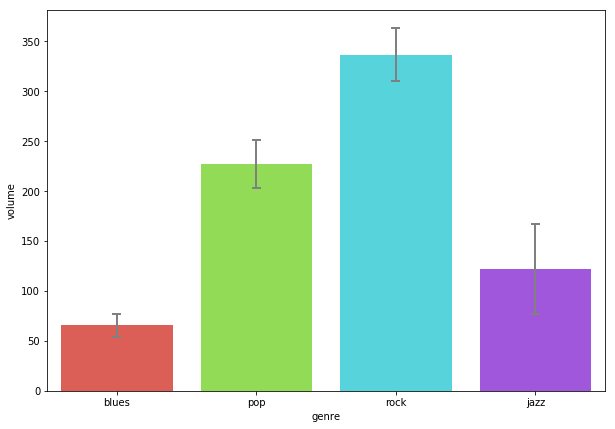

In [7]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
## hint: look at the ann example
##DECISION BOUNDARY
volume = np.linspace(20, 30, 1000) 

from itertools import product
randata = np.array(list(product(volume)))
randata
graph = clf.predict(randata)
db = pd.DataFrame({"volume":randata[:,0], "genre":graph })
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##SCATTERPLOT TRAINING DATA
#sns.scatterplot(data = db, x = "genre", y = "volume", hue="genre")
sns.barplot(x = 'genre', y = 'volume', data = genres,
            palette = 'hls',
            order = ['blues', 'pop', 'rock', 'jazz'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

#plt.scatter(X_train[:,0], X_train[:,1], color="red")
#plt.xlim(0, 30)

In [8]:
## additional stuff you want to add 

In [9]:
# dump your classifier into a pickle file
pickle.dump(clf, open("model.pickle","wb"))